In [4]:
import pandas as pd
df = pd.read_csv("Downloads/tweets.csv") # in the same folder
df

,created_at,id,full_text,text,retweet_count
0,2022-07-17 05:30:01,1548646200957624320,"""Our conclusion is unequivocal: Joe Biden was ...","""Our conclusion is unequivocal: Joe Biden was ...",142
1,2022-07-21 15:44:32,1550250401185894400,17/ And we just learned that Trump continues t...,17/ And we just learned that Trump continues t...,119
2,2022-07-16 14:55:07,1548426025507311616,Career advice: if you want a lucrative job in ...,Career advice: if you want a lucrative job in ...,27
3,2022-07-26 09:45:17,1551971933956329472,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,0
4,2022-07-26 09:43:37,1551971514697846784,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,0
...,...,...,...,...,...
15329,2022-07-24 13:25:55,1551302678826717184,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,0
15330,2022-07-24 13:24:14,1551302257387474944,@DrGJackBrown No. We need ranked choice votin...,@DrGJackBrown No. We need ranked choice votin...,0
15331,2022-07-24 13:24:04,1551302216597872640,@__ItsMorgan___ But voting for a different reg...,@__ItsMorgan___ But voting for a different reg...,1
15332,2022-07-24 13:22:21,1551301782537752576,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,0


Data cleaning

In [5]:
# remove duplicates on text
df = df.drop_duplicates(subset=['text'])

# adjust index
df.index = list(range(len(df)))
df

,created_at,id,full_text,text,retweet_count
0,2022-07-17 05:30:01,1548646200957624320,"""Our conclusion is unequivocal: Joe Biden was ...","""Our conclusion is unequivocal: Joe Biden was ...",142
1,2022-07-21 15:44:32,1550250401185894400,17/ And we just learned that Trump continues t...,17/ And we just learned that Trump continues t...,119
2,2022-07-16 14:55:07,1548426025507311616,Career advice: if you want a lucrative job in ...,Career advice: if you want a lucrative job in ...,27
3,2022-07-26 09:45:17,1551971933956329472,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,0
4,2022-07-26 09:43:37,1551971514697846784,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,0
...,...,...,...,...,...
10418,2022-07-24 13:25:55,1551302678826717184,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,0
10419,2022-07-24 13:24:14,1551302257387474944,@DrGJackBrown No. We need ranked choice votin...,@DrGJackBrown No. We need ranked choice votin...,0
10420,2022-07-24 13:24:04,1551302216597872640,@__ItsMorgan___ But voting for a different reg...,@__ItsMorgan___ But voting for a different reg...,1
10421,2022-07-24 13:22:21,1551301782537752576,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,0


Extract emojis, links, hashtags, @s

In [6]:
text = df["text"]

In [8]:
# extract @s
import re
at_users = []
for row in range(len(df)):
    matches = re.findall(r'@\w*\b', text[row])
    if len(matches) == 0:
        users = 'NaN'
    else:
        users = [user[1:] for user in matches ]
    at_users += [users]

In [9]:
# extract #s
hashtags = []
for row in range(len(df)):
    matches = re.findall(r'#\w*\b', text[row])
    if len(matches) == 0:
        tags = 'NaN'
    tags = [tag[1:] for tag in matches ]
    hashtags += [tags]

In [10]:
# extract links
web_links = []
for row in range(len(df)):
    matches = re.findall(r'http://\S+|https://\S+', text[row])
    if len(matches) == 0:
        links = 'NaN'
    links = [link for link in matches ]
    web_links += [links]

In [11]:
# extract emojis
import emoji
emoji_list = []

for row in range(len(df)):
    matches = []
    temp = list(text[row])
    for ch in temp:
        if (emoji.is_emoji(ch)):
            matches += [ch]
    if len(matches) == 0:
         emoji_list += ["NaN"]
    else:
        emoji_list += [matches]

In [12]:
# store in new columns
df["at_users"] = at_users
df["hashtags"] = hashtags
df["web_links"] = web_links
df["emoji_list"] = emoji_list
df

C:\Users\clair\AppData\Local\Temp\ipykernel_21128\369041898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["at_users"] = at_users
C:\Users\clair\AppData\Local\Temp\ipykernel_21128\369041898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hashtags"] = hashtags
C:\Users\clair\AppData\Local\Temp\ipykernel_21128\369041898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,created_at,id,full_text,text,retweet_count,at_users,hashtags,web_links,emoji_list
0,2022-07-17 05:30:01,1548646200957624320,"""Our conclusion is unequivocal: Joe Biden was ...","""Our conclusion is unequivocal: Joe Biden was ...",142,NaN,[TrumpIsALoser],[https://t.co/T0biGVrdFj],NaN
1,2022-07-21 15:44:32,1550250401185894400,17/ And we just learned that Trump continues t...,17/ And we just learned that Trump continues t...,119,NaN,[],[],NaN
2,2022-07-16 14:55:07,1548426025507311616,Career advice: if you want a lucrative job in ...,Career advice: if you want a lucrative job in ...,27,NaN,[],[],NaN
3,2022-07-26 09:45:17,1551971933956329472,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,0,"[IndivisibleNet, fairfightaction, gop]","[propaganda, rights, VoteBlue2022]",[https://t.co/Kd5zXut4V0],NaN
4,2022-07-26 09:43:37,1551971514697846784,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,0,"[UCANTKEEPABLKM1, TheView, Alyssafarah, TheJus...",[],[],NaN
...,...,...,...,...,...,...,...,...,...
10418,2022-07-24 13:25:55,1551302678826717184,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,0,"[hankhillbwaah, jusdoods, HumanBeing2019, I_am...",[],[],NaN
10419,2022-07-24 13:24:14,1551302257387474944,@DrGJackBrown No. We need ranked choice votin...,@DrGJackBrown No. We need ranked choice votin...,0,[DrGJackBrown],[],[],NaN
10420,2022-07-24 13:24:04,1551302216597872640,@__ItsMorgan___ But voting for a different reg...,@__ItsMorgan___ But voting for a different reg...,1,[__ItsMorgan___],"[WanjigiSpeaks, JimiWanjigiSpeaks]",[],NaN
10421,2022-07-24 13:22:21,1551301782537752576,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,0,"[spideypencil, GoJoeMac, PaulSperry30, CariKel...",[],[],NaN


Cleaning tweets

In [14]:
import numpy as np
import re
import unidecode
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# stopwords = set(stopwords.words('english'))
stopwords = {'its', "hadn't", 'couldn', 'who', 'an', 'have', 'had', "don't", 'y', "mustn't", 'shouldn', 'then', 'through', 't', 'out', 'him', 'my', 'can', "should've", 'by', 'she', "wouldn't", 'having', 'but', 'most', 'when', 's', 'himself', 'than', 'yourself', 'those', 'on', 'ma', 'weren', 'further', "doesn't", 'is', 'for', 'all', 'our', 'up', 'so', 'the', 'll', 'each', 'against', 'how', "wasn't", 'theirs', 'until', 'needn', 'or', "hasn't", 'nor', 'that', 'he', 'their', 'does', 'why', 'very', 'them', 'hers', "it's", 'will', 'before', 'aren', 'haven', "didn't", "haven't", 'to', 'hasn', "won't", 'if', 'from', "isn't", 'wasn', 'below', 'herself', "weren't", 'at', 'didn', 'won', 'into', "you're", 'me', 'own', 'mustn', 'such', 'her', 'as', 'myself', "you'll", 'other', 'not', 'above', 'mightn', 'am', "shan't", "she's", 'they', "aren't", 'only', 'be', 'too', 'about', 'of', 'isn', 'o', 'again', 'more', 'a', 'you', 'under', 'was', 'has', 'off', 'while', 'once', 'over', "you've", 'because', "couldn't", "mightn't", 'his', 'wouldn', 'doesn', 'it', 'don', 'hadn', 'm', 'between', 'during', 'which', 'after', 'this', "needn't", 'themselves', 'do', 'are', 'what', 'should', 'these', 'i', "shouldn't", 'down', 'there', 'in', "you'd", 'some', 'been', 'your', 're', 'yours', "that'll", 'doing', 'and', 'just', 'ain', 'here', 'itself', 'ourselves', 'd', 'where', 'did', 'we', 'any', 've', 'with', 'being', 'shan', 'yourselves', 'now', 'same', 'whom', 'were', 'ours', 'few', 'both'}
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower() # to lower case
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # remove @s
    temp = re.sub("#[A-Za-z0-9_]+","", temp) # remove hashtags
    temp = re.sub(r'http\S+', '', temp) # remove links
    temp = re.sub(r"www.\S+", "", temp) # remove links
    temp = re.sub(r'\n|[^a-zA-Z]', ' ', temp) # remove punctuation
    temp = temp.replace("\n", " ").split()
    temp = [w for w in temp if not w in stopwords] # remove stopwords
    temp = [w for w in temp if not w.isdigit()] # remove numbers
    temp = [unidecode.unidecode(w) for w in temp] # turn non-enlish letters to english letters
#     temp = [lemmatizer.lemmatize(w) for w in temp] # Lemmatization
    temp = " ".join(word for word in temp)
    return temp

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clair\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clair\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\clair\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
clean_text = [clean_tweet(t) for t in df["text"]]
df["clean_text"] = clean_text
df

C:\Users\clair\AppData\Local\Temp\ipykernel_21128\1543507728.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:
C:\Users\clair\AppData\Local\Temp\ipykernel_21128\301898735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = clean_text


,created_at,id,full_text,text,retweet_count,at_users,hashtags,web_links,emoji_list,clean_text
0,2022-07-17 05:30:01,1548646200957624320,"""Our conclusion is unequivocal: Joe Biden was ...","""Our conclusion is unequivocal: Joe Biden was ...",142,NaN,[TrumpIsALoser],[https://t.co/T0biGVrdFj],NaN,conclusion unequivocal joe biden choice majori...
1,2022-07-21 15:44:32,1550250401185894400,17/ And we just learned that Trump continues t...,17/ And we just learned that Trump continues t...,119,NaN,[],[],NaN,learned trump continues commit crimes falling ...
2,2022-07-16 14:55:07,1548426025507311616,Career advice: if you want a lucrative job in ...,Career advice: if you want a lucrative job in ...,27,NaN,[],[],NaN,career advice want lucrative job media amp inc...
3,2022-07-26 09:45:17,1551971933956329472,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,0,"[IndivisibleNet, fairfightaction, gop]","[propaganda, rights, VoteBlue2022]",[https://t.co/Kd5zXut4V0],NaN,primaries expose republican voter fraud myth s...
4,2022-07-26 09:43:37,1551971514697846784,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,0,"[UCANTKEEPABLKM1, TheView, Alyssafarah, TheJus...",[],[],NaN,guy viking helmet walking around capital hour ...
...,...,...,...,...,...,...,...,...,...,...
10418,2022-07-24 13:25:55,1551302678826717184,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,0,"[hankhillbwaah, jusdoods, HumanBeing2019, I_am...",[],[],NaN,theyre pissed think something pissed tried ste...
10419,2022-07-24 13:24:14,1551302257387474944,@DrGJackBrown No. We need ranked choice votin...,@DrGJackBrown No. We need ranked choice votin...,0,[DrGJackBrown],[],[],NaN,no need ranked choice voting every state order...
10420,2022-07-24 13:24:04,1551302216597872640,@__ItsMorgan___ But voting for a different reg...,@__ItsMorgan___ But voting for a different reg...,1,[__ItsMorgan___],"[WanjigiSpeaks, JimiWanjigiSpeaks]",[],NaN,voting different regime draw line youll keep r...
10421,2022-07-24 13:22:21,1551301782537752576,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,0,"[spideypencil, GoJoeMac, PaulSperry30, CariKel...",[],[],NaN,think bad strategy vote hillary woman many san...


In [17]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('omw-1.4')
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['lemmatized_text'] = df['clean_text'].apply(lambda text: lemmatize_words(text))

#tokenization
df['tokenized_text'] = df['lemmatized_text'].apply(word_tokenize)

print(df['tokenized_text'])

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\clair\AppData\Roaming\nltk_data...
C:\Users\clair\AppData\Local\Temp\ipykernel_21128\4256324763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_text'] = df['clean_text'].apply(lambda text: lemmatize_words(text))


0        [conclusion, unequivocal, joe, biden, choice, ...
1        [learned, trump, continues, commit, crime, fal...
2        [career, advice, want, lucrative, job, medium,...
3        [primary, expose, republican, voter, fraud, my...
4        [guy, viking, helmet, walking, around, capital...
                               ...                        
10418    [theyre, pissed, think, something, pissed, tri...
10419    [no, need, ranked, choice, voting, every, stat...
10420    [voting, different, regime, draw, line, youll,...
10421    [think, bad, strategy, vote, hillary, woman, m...
10422    [im, voting, biden, he, candidate, ill, vote, ...
Name: tokenized_text, Length: 10423, dtype: object


C:\Users\clair\AppData\Local\Temp\ipykernel_21128\4256324763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text'] = df['lemmatized_text'].apply(word_tokenize)


In [18]:
# stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
df['stemmed_text'] = df['clean_text'].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))
print(df['stemmed_text'])

0        conclus unequivoc joe biden choic major electo...
1        learn trump continu commit crime fall conspira...
2        career advic want lucr job media amp increasin...
3        primari expos republican voter fraud myth seve...
4        guy vike helmet walk around capit hour go home...
                               ...                        
10418    theyr piss think someth piss tri steal lost el...
10419    no need rank choic vote everi state order brea...
10420    vote differ regim draw line youll keep recycl ...
10421    think bad strategi vote hillari woman mani san...
10422    im vote biden he candid ill vote democrat wo m...
Name: stemmed_text, Length: 10423, dtype: object


C:\Users\clair\AppData\Local\Temp\ipykernel_21128\952025123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_text'] = df['clean_text'].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))


In [19]:
print(df["text"])

0        "Our conclusion is unequivocal: Joe Biden was ...
1        17/ And we just learned that Trump continues t...
2        Career advice: if you want a lucrative job in ...
3        2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...
4        @UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...
                               ...                        
10418    @hankhillbwaah @jusdoods @HumanBeing2019 @I_am...
10419    @DrGJackBrown No.  We need ranked choice votin...
10420    @__ItsMorgan___ But voting for a different reg...
10421    @spideypencil @GoJoeMac @PaulSperry30 @CariKel...
10422    🗳️  I'm voting for Biden; if he's not a candid...
Name: text, Length: 10423, dtype: object


In [20]:
print(df["clean_text"])

0        conclusion unequivocal joe biden choice majori...
1        learned trump continues commit crimes falling ...
2        career advice want lucrative job media amp inc...
3        primaries expose republican voter fraud myth s...
4        guy viking helmet walking around capital hour ...
                               ...                        
10418    theyre pissed think something pissed tried ste...
10419    no need ranked choice voting every state order...
10420    voting different regime draw line youll keep r...
10421    think bad strategy vote hillary woman many san...
10422    im voting biden hes candidate ill vote democra...
Name: clean_text, Length: 10423, dtype: object


In [21]:
df

,created_at,id,full_text,text,retweet_count,at_users,hashtags,web_links,emoji_list,clean_text,lemmatized_text,tokenized_text,stemmed_text
0,2022-07-17 05:30:01,1548646200957624320,"""Our conclusion is unequivocal: Joe Biden was ...","""Our conclusion is unequivocal: Joe Biden was ...",142,NaN,[TrumpIsALoser],[https://t.co/T0biGVrdFj],NaN,conclusion unequivocal joe biden choice majori...,conclusion unequivocal joe biden choice majori...,"[conclusion, unequivocal, joe, biden, choice, ...",conclus unequivoc joe biden choic major electo...
1,2022-07-21 15:44:32,1550250401185894400,17/ And we just learned that Trump continues t...,17/ And we just learned that Trump continues t...,119,NaN,[],[],NaN,learned trump continues commit crimes falling ...,learned trump continues commit crime falling c...,"[learned, trump, continues, commit, crime, fal...",learn trump continu commit crime fall conspira...
2,2022-07-16 14:55:07,1548426025507311616,Career advice: if you want a lucrative job in ...,Career advice: if you want a lucrative job in ...,27,NaN,[],[],NaN,career advice want lucrative job media amp inc...,career advice want lucrative job medium amp in...,"[career, advice, want, lucrative, job, medium,...",career advic want lucr job media amp increasin...
3,2022-07-26 09:45:17,1551971933956329472,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,2022 PRIMARIES EXPOSE REPUBLICAN VOTER FRAUD M...,0,"[IndivisibleNet, fairfightaction, gop]","[propaganda, rights, VoteBlue2022]",[https://t.co/Kd5zXut4V0],NaN,primaries expose republican voter fraud myth s...,primary expose republican voter fraud myth sev...,"[primary, expose, republican, voter, fraud, my...",primari expos republican voter fraud myth seve...
4,2022-07-26 09:43:37,1551971514697846784,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,@UCANTKEEPABLKM1 @TheView @Alyssafarah @TheJus...,0,"[UCANTKEEPABLKM1, TheView, Alyssafarah, TheJus...",[],[],NaN,guy viking helmet walking around capital hour ...,guy viking helmet walking around capital hour ...,"[guy, viking, helmet, walking, around, capital...",guy vike helmet walk around capit hour go home...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10418,2022-07-24 13:25:55,1551302678826717184,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,@hankhillbwaah @jusdoods @HumanBeing2019 @I_am...,0,"[hankhillbwaah, jusdoods, HumanBeing2019, I_am...",[],[],NaN,theyre pissed think something pissed tried ste...,theyre pissed think something pissed tried ste...,"[theyre, pissed, think, something, pissed, tri...",theyr piss think someth piss tri steal lost el...
10419,2022-07-24 13:24:14,1551302257387474944,@DrGJackBrown No. We need ranked choice votin...,@DrGJackBrown No. We need ranked choice votin...,0,[DrGJackBrown],[],[],NaN,no need ranked choice voting every state order...,no need ranked choice voting every state order...,"[no, need, ranked, choice, voting, every, stat...",no need rank choic vote everi state order brea...
10420,2022-07-24 13:24:04,1551302216597872640,@__ItsMorgan___ But voting for a different reg...,@__ItsMorgan___ But voting for a different reg...,1,[__ItsMorgan___],"[WanjigiSpeaks, JimiWanjigiSpeaks]",[],NaN,voting different regime draw line youll keep r...,voting different regime draw line youll keep r...,"[voting, different, regime, draw, line, youll,...",vote differ regim draw line youll keep recycl ...
10421,2022-07-24 13:22:21,1551301782537752576,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,@spideypencil @GoJoeMac @PaulSperry30 @CariKel...,0,"[spideypencil, GoJoeMac, PaulSperry30, CariKel...",[],[],NaN,think bad strategy vote hillary woman many san...,think bad strategy vote hillary woman many san...,"[think, bad, strategy, vote, hillary, woman, m...",think bad strategi vote hillari woman mani san...


Word Count

C:\Users\clair\AppData\Local\Temp\ipykernel_21128\126911917.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word = df['tokenized_text'].apply(pd.Series).stack()


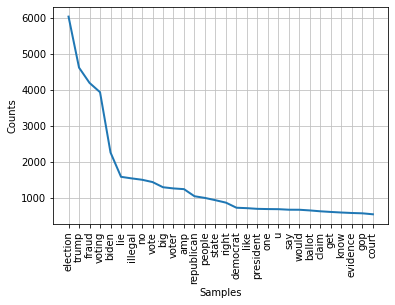

FreqDist({'election': 6026, 'trump': 4610, 'fraud': 4186, 'voting': 3928, 'biden': 2254, 'lie': 1579, 'illegal': 1536, 'no': 1498, 'vote': 1434, 'big': 1290, ...})

In [22]:
# frequency of words
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

word = df['tokenized_text'].apply(pd.Series).stack()
freqdist = FreqDist(word)
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams.update({'font.size': 14})
freqdist.plot(30, cumulative=False)
freqdist